# IQ01 - TP4

## Algorithme de Grover

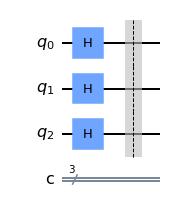

In [1]:
# Etape 1
import numpy as np
# importing Qiskit
from qiskit import *
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
# import basic plot tools
from qiskit.visualization import plot_histogram

# Valeur de N
n=3
# Création du circuit avec N qubits et N bits classiques
grover_circuit = QuantumCircuit(n, n)
# Porte H sur les qubits
grover_circuit.h(range(n))

grover_circuit.barrier()
grover_circuit.draw('mpl')

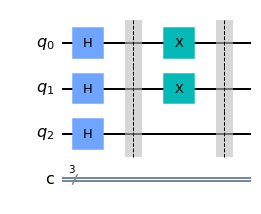

In [2]:
# Etape 2
# Marquage de l'état recherché, ici on prend "100" pour l'exemple donc on applique une porte x au premier et au 2e qubit
grover_circuit.x(0)
grover_circuit.x(1)

grover_circuit.barrier()
grover_circuit.draw('mpl')

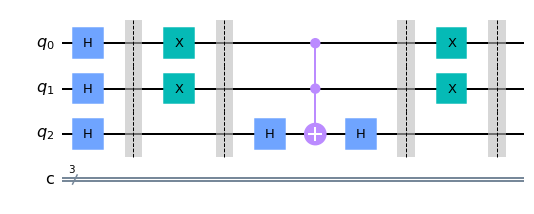

In [3]:
# Etape 3
# Implémentation de l'oracle de Grover
grover_circuit.h(2)
grover_circuit.toffoli(0,1,2)
grover_circuit.h(2)

grover_circuit.barrier()

grover_circuit.x(0)
grover_circuit.x(1)

grover_circuit.barrier()
grover_circuit.draw('mpl')

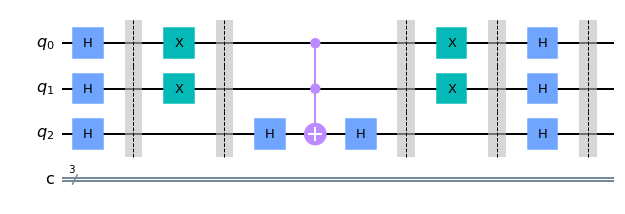

In [4]:
# Etape 4
# Premiere partie de l'opérateur de diffusion (inversion par rapport à la moyenne), on applique H à tous les qubits
grover_circuit.h(range(n))

grover_circuit.barrier()
grover_circuit.draw('mpl')

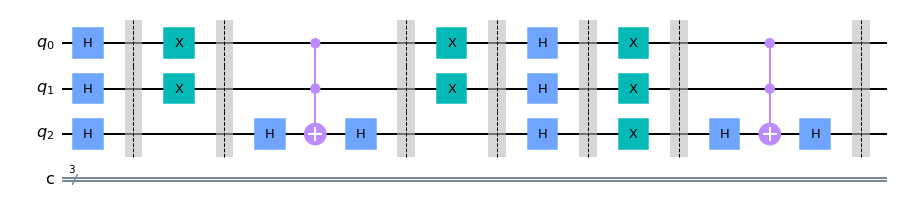

In [5]:
# Etape 5
# Deuxieme partie de l'opérateur de diffusion, inversion par rapport à la moyenne
grover_circuit.x(range(n))
grover_circuit.barrier()

grover_circuit.h(2)
grover_circuit.toffoli(0,1,2)
grover_circuit.h(2)

grover_circuit.barrier()
grover_circuit.draw('mpl')

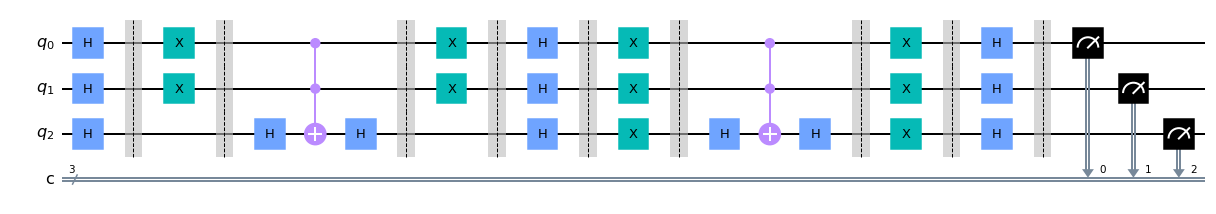

In [6]:
# Etape 6
# Fin de la diffusion et mesures
grover_circuit.x(range(n))
grover_circuit.barrier()
grover_circuit.h(range(n))

grover_circuit.barrier()
grover_circuit.measure(range(n), range(n))
grover_circuit.draw('mpl')

/root/venv/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


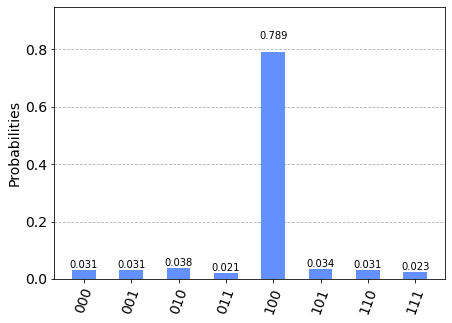

In [7]:
# On affiche les états qu'on a mesuré, et leurs probas
# Si tous les états à 3 qubits on été mesuré alors forcément b='000' et donc le comportement de l'oracle est one-to-one
# Si seulement une sous-partie des états à 3 qubits a été mesuré, alors b!='000' et donc le comportement est two-to-one
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(grover_circuit, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts(grover_circuit)
plot_histogram(counts)

On retrouve bien l'état 100.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ee1cbf87-7285-41f3-b185-437a373e9409' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>